# Tutorial, chapter 7

In this tutorial you will learn how to

- Convert and import the ``sfu-hw-objects-v1`` custom video dataset
- Visualize frames from the video dataset

In [1]:
# https://nbconvert.readthedocs.io/en/latest/removing_cells.html
# use these magic spells to update your classes methods on-the-fly as you edit them:
%reload_ext autoreload
%autoreload 2
from pprint import pprint
from IPython.core.display import display, HTML, Markdown
import ipywidgets as widgets
# %run includeme.ipynb # include a notebook from this same directory
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_77473/1348678174.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Markdown


In this tutorial you will learn how to:

- Download and register video datasets
- Convert and import the ``sfu-hw-objects-v1`` raw custom video data format
- Play around with video datasets, visualize frames and detection results
- Evaluate a video dataset

In chapter 2 of this tutorial you learned how to download and register datasets to fiftyone with the ``compressai-vision register`` command.

Exactly the same command works for video datasets:

In [2]:
!compressai-vision download --dataset-name=quickstart-video --y

importing fiftyone
fiftyone imported

Using list files:     None
Number of images:     ?
Database name   :     quickstart-video
Subname/split   :     None
Target dir      :     None

Dataset already downloaded
Loading existing dataset 'quickstart-video'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


If you have your video dataset arranged in one of the standard [video data formats supported by fiftyone](https://voxel51.com/docs/fiftyone/api/fiftyone.types.dataset_types.html), you're good to go.

Manipulating and visualizing video datasets from python works a bit different to image datasets.  For this, please see the end of this tutorial.

Next we will import a raw custom dataset, namely the [sfu-hw-objects-v1](http://dx.doi.org/10.17632/hwm673bv4m.1) into fiftyone.

This format consists raw YUV video files and annotations.  Let's see how the folder structure is roughly organized.  We'll be using in this tutorial a "mock" version of the dataset with only two video classes:

In [3]:
path_to_sfu_hw_objects_v1="/home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1"

In [4]:
!find {path_to_sfu_hw_objects_v1} -name "*.mkv" | xargs -I + rm +
!find {path_to_sfu_hw_objects_v1} -name "*.webm" | xargs -I + rm +
!find {path_to_sfu_hw_objects_v1} -name "*.mp4" | xargs -I + rm +

In [5]:
!tree {path_to_sfu_hw_objects_v1} --filelimit=10 | cat

/home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1
├── ClassC
│   ├── Annotations
│   │   └── BasketballDrill [502 entries exceeds filelimit, not opening dir]
│   └── BasketballDrill_832x480_50Hz_8bit_P420.yuv
└── ClassX
    ├── Annotations
    │   └── BasketballDrill
    │       ├── BasketballDrill_832x480_50_seq_001.txt
    │       ├── BasketballDrill_832x480_50_seq_002.txt
    │       ├── BasketballDrill_832x480_50_seq_003.txt
    │       ├── BasketballDrill_832x480_50_seq_004.txt
    │       └── BasketballDrill_832x480_object.list
    └── BasketballDrill_832x480_50Hz_8bit_P420.yuv -> /home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1/ClassC/BasketballDrill_832x480_50Hz_8bit_P420.yuv

6 directories, 7 files


Importing mpeg-vcom custom datasets (for more info see Dataset section of the documentation) can be done with ``import-custom`` command.  For ``sfu-hw-objects-v1`` it also converts on-the-fly the raw YUV images into proper video format:

In [6]:
!compressai-vision import-custom --dataset-type=sfu-hw-objects-v1 --dir={path_to_sfu_hw_objects_v1} --y

importing fiftyone
fiftyone imported

Importing a custom video format into fiftyone

Dataset type           :  sfu-hw-objects-v1
Dataset root directory :  /home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1

finding .yuv files from /home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1
ffmpeg -y -f rawvideo -pixel_format yuv420p -video_size 832x480 -i /home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1/ClassC/BasketballDrill_832x480_50Hz_8bit_P420.yuv -an -c:v h264 -q 0 /home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1/ClassC/Annotations/BasketballDrill/video.mp4
ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa

frame=  501 fps=131 q=-1.0 Lsize=    3979kB time=00:00:19.92 bitrate=1636.2kbits/s speed= 5.2x    
video:3972kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.169325%
[libx264 @ 0x559c0f454300] frame I:3     Avg QP:22.61  size: 56539
[libx264 @ 0x559c0f454300] frame P:126   Avg QP:24.67  size: 17479
[libx264 @ 0x559c0f454300] frame B:372   Avg QP:28.66  size:  4556
[libx264 @ 0x559c0f454300] consecutive B-frames:  1.0%  0.0%  0.0% 99.0%
[libx264 @ 0x559c0f454300] mb I  I16..4: 13.3% 37.2% 49.4%
[libx264 @ 0x559c0f454300] mb P  I16..4:  0.1% 11.2%  6.3%  P16..4: 42.9% 16.1% 11.6%  0.0%  0.0%    skip:11.7%
[libx264 @ 0x559c0f454300] mb B  I16..4:  0.0%  0.7%  0.4%  B16..8: 35.6%  9.2%  3.6%  direct: 3.0%  skip:47.6%  L0:43.7% L1:43.7% BI:12.7%
[libx264 @ 0x559c0f454300] 8x8 transform intra:60.9% inter:67.7%
[libx264 @ 0x559c0f454300] coded y,uvDC,uvAC intra: 87.9% 88.2% 66.7% inter: 22.5% 18.1% 4.7%
[libx264 @ 0x559c0f454300] i16 v,h,dc,p: 57% 13%  8% 22%


In order to demonstrate how video datasets are used, let's continue in python notebook:

In [7]:
import cv2
import matplotlib.pyplot as plt
import fiftyone as fo
from fiftyone import ViewField as F
from math import floor

In [8]:
dataset=fo.load_dataset("sfu-hw-objects-v1")

In [9]:
dataset

Name:        sfu-hw-objects-v1
Media type:  video
Num samples: 2
Persistent:  True
Tags:        []
Sample fields:
    id:         fiftyone.core.fields.ObjectIdField
    filepath:   fiftyone.core.fields.StringField
    tags:       fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.VideoMetadata)
    media_type: fiftyone.core.fields.StringField
    class_tag:  fiftyone.core.fields.StringField
    name_tag:   fiftyone.core.fields.StringField
    custom_id:  fiftyone.core.fields.StringField
Frame fields:
    id:           fiftyone.core.fields.ObjectIdField
    frame_number: fiftyone.core.fields.FrameNumberField
    detections:   fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In contrast to image datasets where each sample was an image, now a sample corresponds to a video:

In [10]:
dataset.first()

<Sample: {
    'id': '636cfe83dd3cdcdcd97f0f64',
    'media_type': 'video',
    'filepath': '/home/sampsa/silo/interdigital/mock/SFU-HW-Objects-v1/ClassC/Annotations/BasketballDrill/video.mp4',
    'tags': BaseList([]),
    'metadata': None,
    'class_tag': 'ClassC',
    'name_tag': 'BasketballDrill',
    'custom_id': 'ClassC_BasketballDrill',
    'frames': <Frames: 500>,
}>

There is a reference to the video file and a ``Frames`` object, encapsulating ground truths etc. data for each and every frame.  For ``sfu-hw-objects-v1`` in particular, ``class_tag`` corresponds to the class directories (ClassA, ClassB, etc.), while ``name_tag`` to the video descriptive names (BasketballDrill, Traffic, PeopleOnStreeet, etc.).  Let's pick a certain video sample:

In [11]:
sample = dataset[ (F("name_tag") == "BasketballDrill") & (F("class_tag") == "ClassC") ].first()

Take a look at the first frame ground truth detections (note that frame indices start from 1):

In [12]:
sample.frames[1]

<FrameView: {
    'id': '636cfe832c777ac161910233',
    'frame_number': 1,
    'detections': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '636cfe82dd3cdcdcd97efbb3',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
                'label': 'person',
                'bounding_box': BaseList([0.2525, 0.8288, 0.1812, 0.1678]),
                'mask': None,
                'confidence': 1.0,
                'index': None,
            }>,
            <Detection: {
                'id': '636cfe82dd3cdcdcd97efbb4',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
                'label': 'person',
                'bounding_box': BaseList([0.63635, 0.00874999999999998, 0.1207, 0.3149]),
                'mask': None,
                'confidence': 1.0,
                'index': None,
            }>,
            <Detection: {
                'id': '636cfe82dd3cdcdcd97efbb5',
       

In [21]:
vid=cv2.VideoCapture(sample.filepath)

In [22]:
print("number of frames:",int(vid.get(cv2.CAP_PROP_FRAME_COUNT)))

number of frames: 501


Let's define a small helper function:

In [23]:
def draw_detections(sample: fo.Sample, vid: cv2.VideoCapture, nframe: int):
    nmax=int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
    if nframe > nmax:
        raise AssertionError("max frame is " + str(nmax))
    ok = vid.set(cv2.CAP_PROP_POS_FRAMES, nframe-1)
    if not ok:
        raise AssertionError("seek failed")
    ok, arr = vid.read() # BGR image in arr
    if not ok:
        raise AssertionError("no image")
    for detection in sample.frames[nframe].detections.detections:
        x0, y0, w, h = detection.bounding_box # rel coords
        x1, y1, x2, y2 = floor(x0*arr.shape[1]), floor(y0*arr.shape[0]), floor((x0+w)*arr.shape[1]), floor((y0+h)*arr.shape[0])
        arr=cv2.rectangle(arr, (x1, y1), (x2, y2), (255, 0, 0), 5)
    return arr

In [24]:
img=draw_detections(sample, vid, 200)
img_ = img[:,:,::-1] # BGR -> RGB

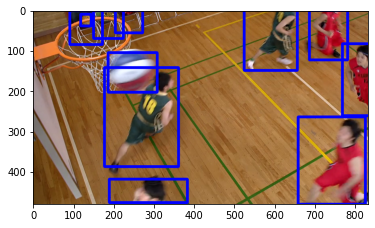

In [25]:
plt.imshow(img_)
vid.release()

For now, let's get back to terminal command line.

Everything that you learned for image datasets, applies for video datasets as well: ``compressai-vision import-custom`` can be used to import mpeg-vcm datasets.  ``compressai-vision app`` can be used to visualize interactively datasets.

When using the fiftyone app, there is a small catch though.  Web-browsers are picky on the type of video they can play.  For some video datasets, in order to view them in the app, you need to create separate "side-data" videos for visualization.  These you can generate these automagically with the ``compressai-vision make-thumbnails`` command.  Note that ``compressai-vision import-custom`` generates you these thumbnails on-the-go when you import new video sets.  Switching between the main video and "side-data" video is demoed in [this animation](https://voxel51.com/docs/fiftyone/_images/app-multiple-media-fields.gif)

In chapters 3 and 4 you learned how to evaluate models (in serial and parallel) with the ``compressai-vision detectron2-eval`` command.

The same command can be used to evaluate video datasets as well.  Here the parameter ``--slice`` refers to videos, not individual image (as usual, for a production run, you would remove the ``--slice`` parameter):

In [19]:
!compressai-vision detectron2-eval --y --dataset-name=sfu-hw-objects-v1 \
--slice=1:2 \
--scale=100 \
--progressbar \
--output=detectron2_test.json \
--model=COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml

importing fiftyone
fiftyone imported

Using dataset          : sfu-hw-objects-v1
Dataset media type     : video
Dataset tmp clone      : detectron-run-sampsa-sfu-hw-objects-v1-2022-11-10-15-37-24-746313
Image scaling          : 100
Number of samples      : 1
Torch device           : cpu
Detectron2 model       : COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml
Model was trained with : coco_2017_train
** Evaluation without Encoding/Decoding **
Ground truth data field name
                       : detections
Eval. results will be saved to datafield
                       : detectron-predictions
Evaluation protocol    : open-images
Progressbar            : True
Print progress         : 0
Output file            : detectron2_test.json
Peek model classes     :
['airplane', 'apple', 'backpack', 'banana', 'baseball bat'] ...
Peek dataset classes   :
['chair', 'person', 'sports ball'] ...
cloning dataset sfu-hw-objects-v1 to detectron-run-sampsa-sfu-hw-objects-v1-2022-11-10-15-37-24-746313
ins

Take a look at the results:

In [20]:
!cat detectron2_test.json

{
  "dataset": "sfu-hw-objects-v1",
  "gt_field": "detections",
  "tmp datasetname": "detectron-run-sampsa-sfu-hw-objects-v1-2022-11-10-15-37-24-746313",
  "slice": "1:2",
  "model": "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml",
  "codec": "",
  "qpars": null,
  "bpp": [
    null
  ],
  "map": [
    0.5370370370370371
  ],
  "map_per_class": [
    {
      "chair": 0.1111111111111111,
      "person": 1.0,
      "sports ball": 0.5
    }
  ]
}